In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow.keras as keras
import numpy as np

## Data Preprocessing part

From this section, data preprocessing and analysis part starts here...

In [ ]:
data = pd.read_csv("./ITC.csv")
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,ITC,EQ,656.00,694.00,708.50,675.0,708.50,708.50,701.81,562715,3.949174e+13,NaN,NaN,NaN
1,2000-01-04,ITC,EQ,708.50,714.00,729.00,694.3,710.65,712.35,714.16,712637,5.089379e+13,NaN,NaN,NaN
2,2000-01-05,ITC,EQ,712.35,716.25,758.90,660.0,731.00,726.20,732.43,1382149,1.012325e+14,NaN,NaN,NaN
3,2000-01-06,ITC,EQ,726.20,741.00,784.30,741.0,784.30,784.30,776.63,721618,5.604266e+13,NaN,NaN,NaN
4,2000-01-07,ITC,EQ,784.30,832.40,847.05,824.0,847.05,847.05,841.25,231209,1.945046e+13,NaN,NaN,NaN


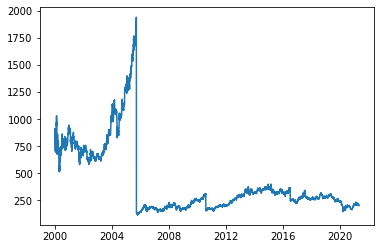

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler(feature_range=(0,1))

data['Date'] = pd.to_datetime(data.Date, format="%Y-%m-%d")
data.index = data['Date']

plt.plot(data['Close'], label="Close price")

In [ ]:
new_dat = pd.DataFrame(index=range(0, len(data)), columns=['Date', 'Close'])
for i in range(0, len(data)):
  new_dat['Date'][i] = data['Date'][i]
  new_dat['Close'][i] = data['Close'][i]
  
new_dat.index = new_dat.Date
new_dat.drop('Date', axis=1, inplace=True)

In [ ]:
# Split
from sklearn.model_selection import train_test_split

X = []
Y = []
window_size=50
for i in range(0 , len(data) - window_size -1 , 1):
    first = data.iloc[i, 4]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((data.iloc[i + j, 8] - first) / first)
    # for j in range(week):
    temp2.append((data.iloc[i +window_size, 8] - first) / first)
    # X.append(np.array(stock.iloc[i:i+window_size,4]).reshape(50,1))
    # Y.append(np.array(stock.iloc[i+window_size,4]).reshape(1,1))
    # print(stock2.iloc[i:i+window_size,4])
    X.append(np.array(temp).reshape(50, 1))
    Y.append(np.array(temp2).reshape(1,1))

x_train, x_test, train_label, test_label = train_test_split(X, Y, test_size=0.2, shuffle=True)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_label = np.array(train_label)
test_label = np.array(test_label)

train_X = train_X.reshape(train_X.shape[0],1,50,1)
test_X = test_X.reshape(test_X.shape[0],1,50,1)

## Training part
From this section, model creation, training is done...

In [ ]:
from keras.layers import LSTM, Dense, Conv1D, MaxPooling1D, Dropout, Activation, Flatten, Bidirectional, TimeDistributed, MaxPool2D
from keras.layers import GlobalAveragePooling2D

model = keras.Sequential()
model.add(TimeDistributed(Conv1D(128, kernel_size=1, activation='relu', input_shape=(None,50,1))))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(256, kernel_size=1, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(512, kernel_size=1, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Flatten()))
model.add(Bidirectional(LSTM(200,return_sequences=True)))
model.add(Dropout(0.25))
model.add(Bidirectional(LSTM(200,return_sequences=False)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='RMSprop', loss='mse')
model.fit(train_X, train_label, validation_data=(test_X,test_label), epochs=40,batch_size=64,shuffle =False)

Epoch 1/40
66/66 [==============================] - 21s 184ms/step - loss: 0.0067 - val_loss: 0.0028
Epoch 2/40
66/66 [==============================] - 10s 154ms/step - loss: 0.0042 - val_loss: 0.0033
Epoch 3/40
66/66 [==============================] - 10s 150ms/step - loss: 0.0036 - val_loss: 0.0027
Epoch 4/40
66/66 [==============================] - 10s 151ms/step - loss: 0.0036 - val_loss: 0.0038
Epoch 5/40
66/66 [==============================] - 10s 154ms/step - loss: 0.0036 - val_loss: 0.0038
Epoch 6/40
66/66 [==============================] - 10s 152ms/step - loss: 0.0035 - val_loss: 0.0022
Epoch 7/40
66/66 [==============================] - 10s 154ms/step - loss: 0.0035 - val_loss: 0.0038
Epoch 8/40
66/66 [==============================] - 10s 159ms/step - loss: 0.0033 - val_loss: 0.0060
Epoch 9/40
66/66 [==============================] - 10s 156ms/step - loss: 0.0032 - val_loss: 0.0039
Epoch 10/40
66/66 [==============================] - 10s 159ms/step - loss: 0.0032 - val_lo

## Testing
From this section, testing needs to be done... Needs with help of a mate

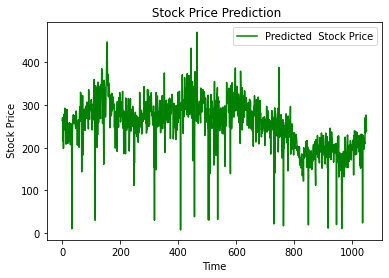

In [ ]:
predicted  = model.predict(test_X)
test_label = (test_label)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_t = len(train_X)
for j in range(len_t , len_t + len(test_X)):
    temp =data.iloc[j,8]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()